### Try-it 8.1: The "Best" Model

This module was all about regression and using Python's scikitlearn library to build regression models.  Below, a dataset related to real estate prices in California is given. While many of the assignments you have built and evaluated different models, it is important to spend some time interpreting the resulting "best" model.  


Your goal is to build a regression model to predict the price of a house in California.  After doing so, you are to *interpret* the model.  There are many strategies for doing so, including some built in methods from scikitlearn.  One example is `permutation_importance`.  Permutation feature importance is a strategy for inspecting a model and its features importance.  

Take a look at the user guide for `permutation_importance` [here](https://scikit-learn.org/stable/modules/permutation_importance.html).  Use  the `sklearn.inspection` modules implementation of `permutation_importance` to investigate the importance of different features to your regression models.  Share these results on the discussion board.

In [96]:
import pandas as pd
import plotly.express as px
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer 
from sklearn.metrics import mean_squared_error

In [97]:
import numpy as np
import matplotlib.pyplot as plt

In [98]:
cali = pd.read_csv('data/housing.csv')

In [99]:
cali.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [100]:
cali.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [101]:
X = cali.drop('median_house_value', axis = 1)
y = cali['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=22)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(type(X_train), type(y_train))

(14447, 9)
(14447,)
(6193, 9)
(6193,)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [102]:
cali['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [103]:
cat_features = ['ocean_proximity']
num_features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']

preprocessor = ColumnTransformer(
    transformers=[
        ("num", make_pipeline(SimpleImputer(), StandardScaler(),PolynomialFeatures(degree=3, include_bias=False)), num_features),
        ("cat", make_pipeline(OneHotEncoder(), SimpleImputer()), cat_features),
    ])

# Create a pipeline
pipeline = Pipeline([('Preprocessor', preprocessor), ('LinModel', LinearRegression())])
pipeline

Pipeline(steps=[('Preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler()),
                                                                  ('polynomialfeatures',
                                                                   PolynomialFeatures(degree=3,
                                                                                      include_bias=False))]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder()),
                                                                  ('simpleimputer',
                                                                   SimpleImputer())]),
                                                  ['ocean_proximity'])])),
                ('LinModel', LinearRegression())])

In [104]:
pipeline.fit(X_train,y_train)

y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f'MSE for training data: {mse_train}')
print(f'MSE for test data: {mse_test}')

MSE for training data: 3471735971.849708
MSE for test data: 3876858936.3154645


In [105]:
results = permutation_importance(pipeline, X_test, y_test)
importances = pd.DataFrame(data=results.importances_mean, index=X.columns, columns=['importance']).sort_values(by='importance', ascending=False).reset_index(names=['feature'])
importances

,feature,importance
0,households,652.340175
1,total_bedrooms,76.972813
2,total_rooms,28.618343
3,population,12.884132
4,latitude,2.896446
5,longitude,1.964329
6,median_income,0.982225
7,housing_median_age,0.117835
8,ocean_proximity,0.028143


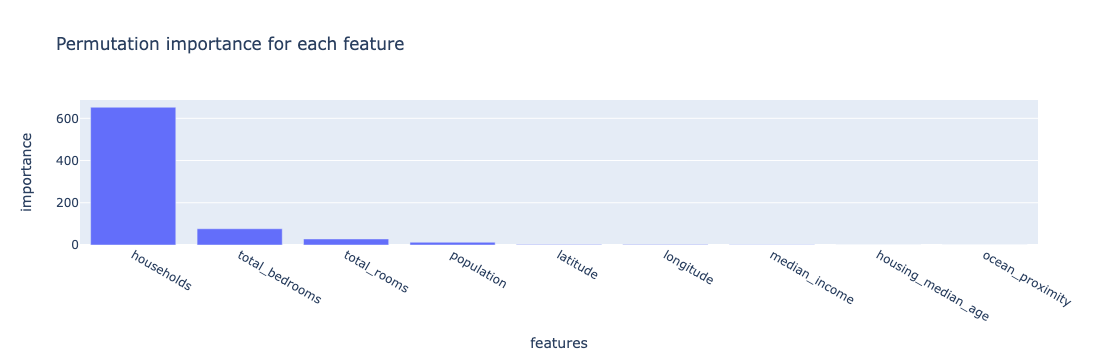

In [106]:
px.bar(x=importances['feature'], y=importances['importance'], title="Permutation importance for each feature", labels={'x': 'features', 'y':'importance'})